In [1]:
import pandas as pd

df = pd.read_csv("/content/hierarchical_clustering_dataset.csv")

print(df.head())
# dataset contains three features that we will group together into clusters to easily see how hierarchical clustering works

   feature_1  feature_2  feature_3
0   2.397371   4.889389   1.518151
1   3.218424   4.812677   0.812690
2   3.263370   5.613948   0.624420
3   2.434048   4.629266   0.627416
4   2.193570   3.469376  -0.379934


# 🧩 Hierarchical Clustering (Plain Language Explanation)

Hierarchical clustering is a machine learning technique that groups similar data points together **step by step**, forming a structure that looks like a **family tree**. This tree is called a **dendrogram**, and it helps you understand how clusters form at different levels.

There are two main ways to build this hierarchy:

---

## 🔹 1. Agglomerative Clustering (Bottom-Up)
This is the most common type.

1. Start with **every data point as its own cluster**.  
2. Find the **two closest clusters** (based on distance).  
3. **Merge them** into a new cluster.  
4. Repeat until all points are merged into one big cluster.

It’s like watching tiny groups slowly join together into larger and larger groups.

---

## 🔹 2. Divisive Clustering (Top-Down)
Works in the opposite direction:

1. Start with **one big cluster** containing all data.  
2. Split it into smaller clusters.  
3. Keep splitting until each point is alone.

---

## 🔧 How “Closeness” (Distance) Is Measured

To decide how clusters merge or split, hierarchical clustering uses **linkage methods**, such as:

- **Single linkage** – uses the closest points between clusters  
- **Complete linkage** – uses the farthest points  
- **Average linkage** – uses the average distance  
- **Ward’s method** – merges clusters in a way that minimizes overall variance (very common)

Each method produces slightly different cluster shapes.

---

## 🌳 What the Dendrogram Shows

A dendrogram is a tree-like diagram that shows:

- Which clusters merged  
- At what **distance** they merged  
- How many clusters you get by “cutting” the tree at a chosen height  

It’s an intuitive way to explore cluster structure.

---

## 🎯 When Hierarchical Clustering Is Useful

- You want to **see** how clusters naturally form.  
- You don’t want to specify the number of clusters ahead of time.  
- You’re working with **small or medium-sized datasets**.  
- You want to explore the **relationships** between groups of points.

---

## 🚫 When It’s Not Ideal

- It can be **slow** for very large datasets.  
- It doesn’t scale as well as K-Means.  
- It can be sensitive to noise and outliers.

---


In [2]:
# first, make sure to scale the data for hierarchical clustering
from sklearn.preprocessing import StandardScaler

X = df[["feature_1", "feature_2", "feature_3"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# next, we need to compute the linkage matrix (Z) which is the "merge history" of the clustering process
  # it records which clusters are merged, at what distance, and how many points were in each merged cluster
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X_scaled, method='ward') # let's use Ward's method becauseit minimizes variance when clusters merge, producing compact, well-separated clusters - great for numeric data
print("Linkage matrix shape: ", Z.shape)

Linkage matrix shape:  (999, 4)


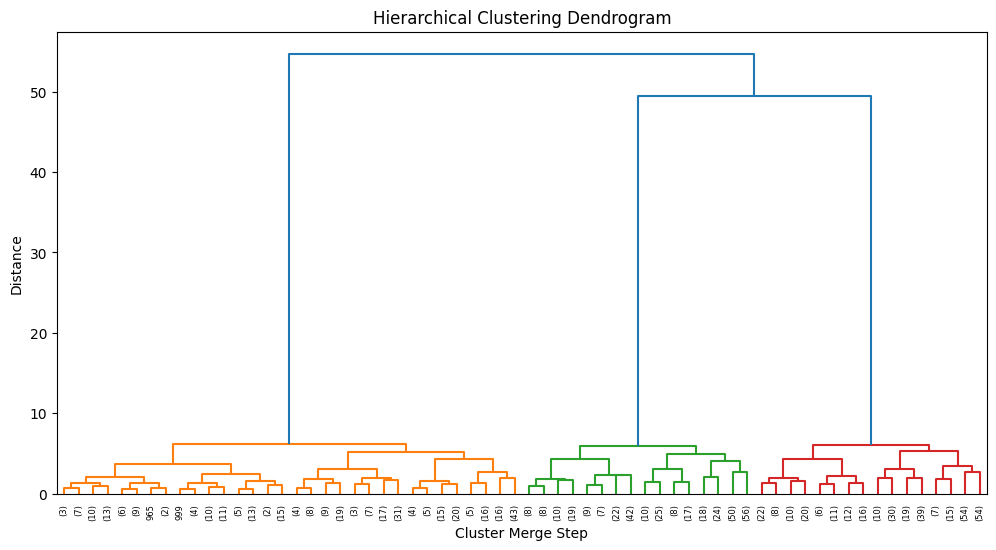

In [6]:
# next, plot a dendrogram in order to visualize the hierarchy
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=5) # truncates for readability
# truncate_mode='level' cuts the tree after a certain number of levels, shows only the top p levels of merges
# p=5 works with truncate_mode, where we are keeping the top p levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Merge Step")
plt.ylabel("Distance")
plt.show()

In [13]:
# next, we need to take the linkage matrix (Z) and turn it into actual cluster labels based on a cutoff rule (distance threshold or number of clusters)
# to do this, we need to use the fcluster function

# first, we need to determine how many clusters we want the model to group by
# we will use the dendrogram gap method
merge_distances = Z[:, 2]

# find the largest gap between successive merges
import numpy as np
gaps = np.diff(merge_distances)
largest_gap_index = np.argmax(gaps)

# estimated number of clusters = # of merges remaining after that index + 1
estimated_k = (len(merge_distances) - largest_gap_index) + 1
print("Estimated number of clusters: ", estimated_k)

# assign clusters using estimated_k to get actual cluster labels
clusters = fcluster(Z, t=estimated_k, criterion='maxclust')
print("\nCluster label counts:\n", pd.Series(clusters).value_counts())

Estimated number of clusters:  4

Cluster label counts:
 3    333
4    333
2    222
1    112
Name: count, dtype: int64


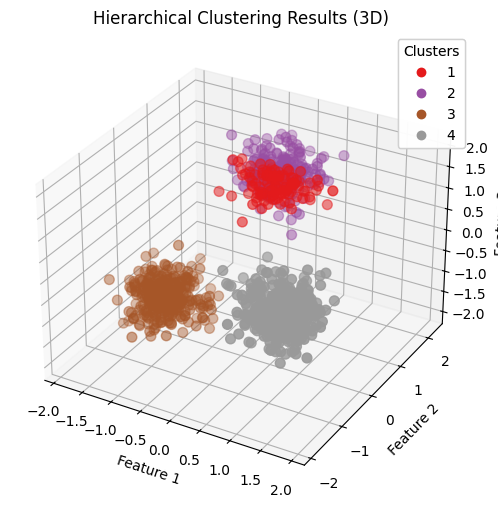

In [14]:
# now, let's visualize the clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# plot points colored by cluster
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], c=clusters, cmap='Set1', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Hierarchical Clustering Results (3D)')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

In [15]:
# it appears that we should have separated our data into 3 clusters rather than 4 since clusters 1 and 2 are overlapping into one cluster
  # also, clusters 3 and 4 split evenly into 333 data points while clusters 1 and 2 seem to have split the remaining 333
# let's try again with 3 clusters and see how it looks
k = 3
clusters = fcluster(Z, t=k, criterion='maxclust')
print("\nCluster label counts:\n", pd.Series(clusters).value_counts())


Cluster label counts:
 1    334
2    333
3    333
Name: count, dtype: int64


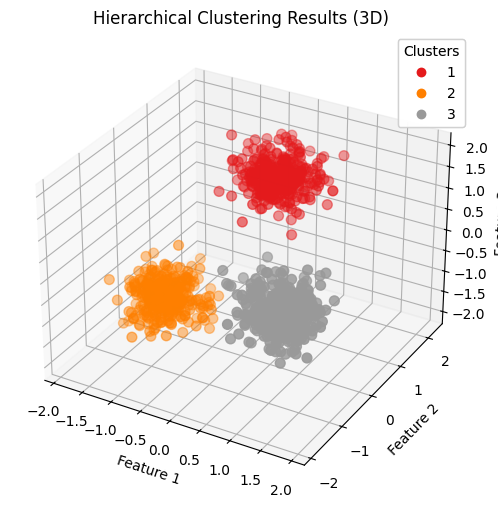

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# plot points colored by cluster
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], c=clusters, cmap='Set1', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Hierarchical Clustering Results (3D)')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()
# this looks much better with 3 clusters

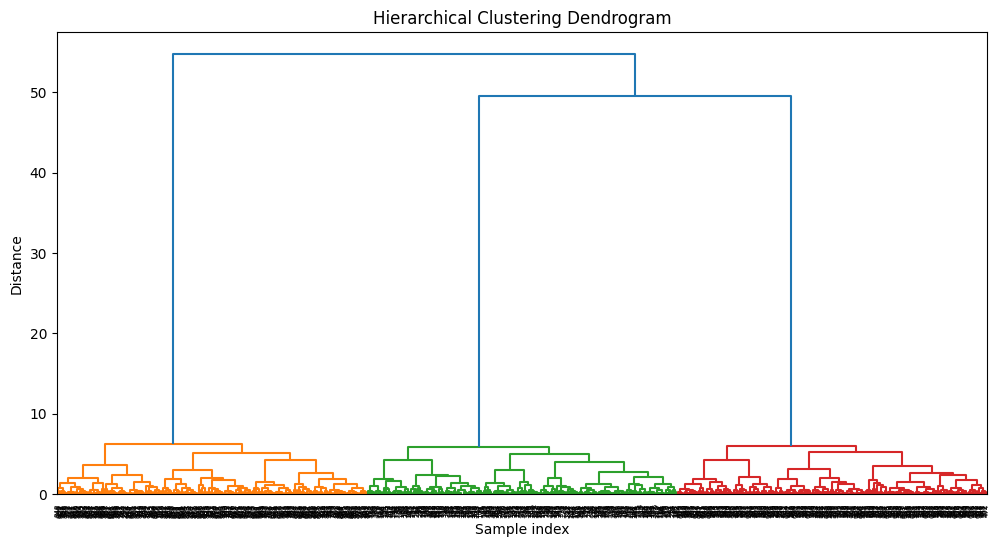

In [18]:
# lastly, let's see what the dendrogram plot looks like when we increase p (readability will be harder)
plt.figure(figsize=(12, 6))
dendro = dendrogram(Z, truncate_mode='level', p=15)  # p limits number of levels shown
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()